In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras import layers

def load_data (data_path):
    data_dir_list = os.listdir(data_path)
    labels=[]
    data=[]
    num_class=0
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)    
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            data.append(input_img)
            labels.append(num_class)
        num_class+=1

    data = np.array(data)
    data = data.astype('float32')
    data /= 255
    labels=np.array(labels)
    print('data shape',data.shape)
    print('labels shape',labels.shape)
    return data, labels

In [21]:
data_path='Datasets\Sagem_2011_merge'
data, labels=load_data (data_path)

num_classes=2
Y = to_categorical(labels, num_classes)
X_train,y_train = shuffle(data,Y, random_state=2)
X_train, X_test, y_train , y_test = train_test_split(X_train,y_train, test_size=0.3, random_state=2)

data shape (1827, 384, 352, 3)
labels shape (1827,)


In [22]:
model = Sequential()
model.add(Convolution2D(16, 3,3,input_shape=data[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(64, 3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(learning_rate=0.02, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 117, 16)      448       
                                                                 
 activation_10 (Activation)  (None, 128, 117, 16)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 58, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 19, 32)        4640      
                                                                 
 activation_11 (Activation)  (None, 21, 19, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 9, 32)        0         
 2D)                                                  

In [23]:
# Training
n_epoch=50
hist = model.fit(X_train, y_train, batch_size=15, epochs=n_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
86/86 [==============================] - 5s 49ms/step - loss: 0.6890 - accuracy: 0.5423 - val_loss: 0.7045 - val_accuracy: 0.5519
Epoch 2/50
86/86 [==============================] - 4s 48ms/step - loss: 0.6894 - accuracy: 0.5383 - val_loss: 0.6833 - val_accuracy: 0.5519
Epoch 3/50
86/86 [==============================] - 4s 47ms/step - loss: 0.6846 - accuracy: 0.5493 - val_loss: 0.6933 - val_accuracy: 0.5519
Epoch 4/50
86/86 [==============================] - 4s 47ms/step - loss: 0.6712 - accuracy: 0.5626 - val_loss: 0.6719 - val_accuracy: 0.5920
Epoch 5/50
86/86 [==============================] - 4s 47ms/step - loss: 0.6556 - accuracy: 0.5806 - val_loss: 0.6216 - val_accuracy: 0.6503
Epoch 6/50
86/86 [==============================] - 4s 48ms/step - loss: 0.6408 - accuracy: 0.5978 - val_loss: 0.6553 - val_accuracy: 0.5956
Epoch 7/50
86/86 [==============================] - 4s 47ms/step - loss: 0.6163 - accuracy: 0.6408 - val_loss: 0.6935 - val_accuracy: 0.6175
Epoch 8/50
86

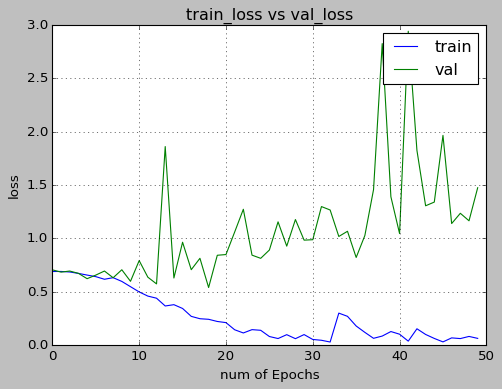

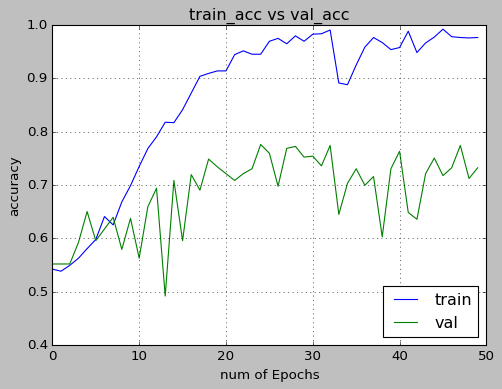

In [24]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(n_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

In [27]:
# Pour classification d'une attaque non entrainée
# data_test_path='Datasets\Sagem_2011_only_gelatin'
# data_test, labels_test=load_data (data_test_path)
# predict = model.predict(data_test)
# count_spoof = 0
# count_total = 0
# for p in predict:
#     if p[0]<p[1]:
#         count_spoof +=1
#     count_total += 1
# print(count_spoof,count_total)
# print('score :',float(count_spoof)/float(count_total))

data shape (225, 384, 352, 3)
labels shape (225,)
105 225
score : 0.4666666666666667
